<a href="https://www.kaggle.com/gabrielkamkar/titanic?scriptVersionId=85018467" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

A large thank you to Ken Jee on Youtube for helping me walk through this first project. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plot

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
'''
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
'''

'\nVariable\tDefinition\tKey\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\nsex\tSex\t\nAge\tAge in years\t\nsibsp\t# of siblings / spouses aboard the Titanic\t\nparch\t# of parents / children aboard the Titanic\t\nticket\tTicket number\t\nfare\tPassenger fare\t\ncabin\tCabin number\t\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\n'

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])

%matplotlib inline

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# **Understand the Data**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
# separate data into numeric and categorical

train_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]


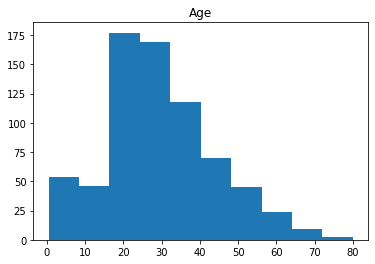

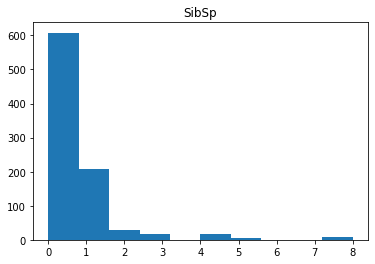

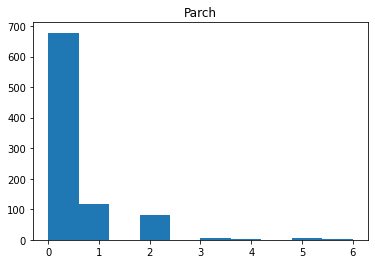

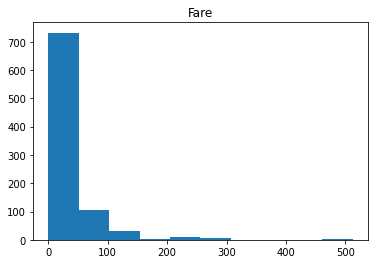

In [7]:
for i in train_num.columns:
    plot.hist(train_num[i])
    plot.title(i)
    plot.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

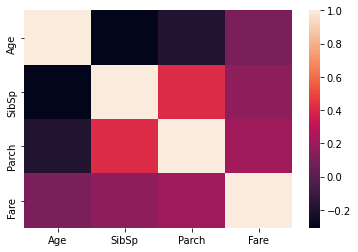

In [8]:
# look at correlations between the numeric values

print(train_num.corr())

# can use a heatmap for a better visualization

sns.heatmap(train_num.corr())

In [9]:
# make a pivot table to see how survival depends on the varaibles

pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


This pivot table shows the average age, fare, parch, and sibsp of 1: survived, 0: didn't

See lower age, higher fare, more parent/child, and less sibling/spouse for survived. Not very significant though.

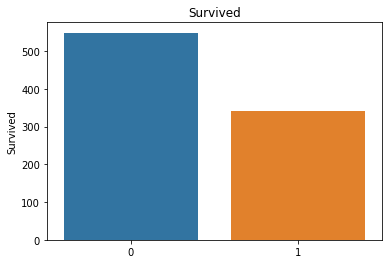

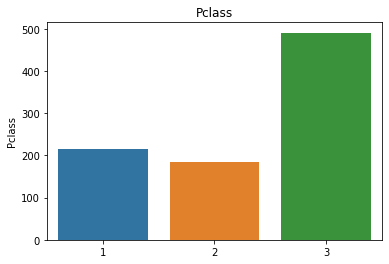

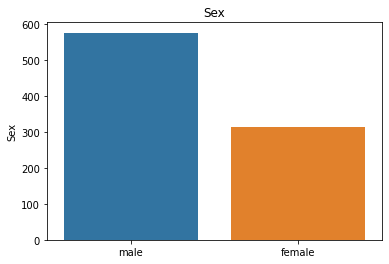

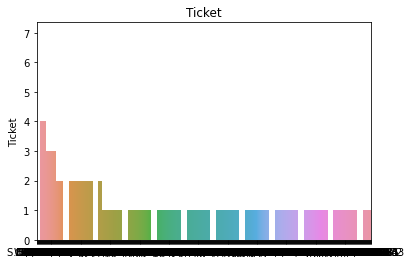

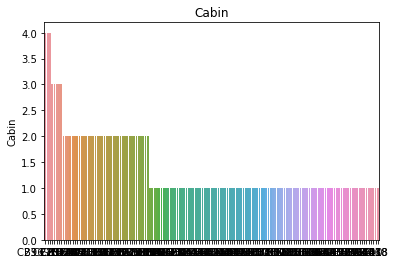

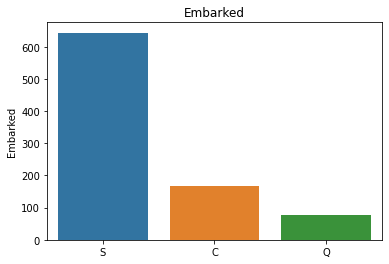

In [10]:
# make bar plots for categorical data

for i in train_cat.columns:
    sns.barplot(x = train_cat[i].value_counts().index,
                y = train_cat[i].value_counts()).set_title(i)
    plot.show()
    

In [11]:
# make more pivot tables to understand survive vs categorical

print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass',
               values = 'Ticket', aggfunc = 'count'))
print()


print(pd.pivot_table(train, index = 'Survived', columns = 'Sex',
               values = 'Ticket', aggfunc = 'count'))

print()

print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked',
               values = 'Ticket', aggfunc = 'count'))



Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# **Feature Engineering**

Make the tickets and cabin into less categories in order to fit well into a model, can't have over 100 different cabins types, there must be some sort of general category you can put them into.

**CABINS**

In [12]:
# check if people had multiple cabins or just one to see if its even useful as a predictor

train['cabin_multiple'] = train.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))

train.cabin_multiple.value_counts()

# so about 2/3 of the cabin values are NA
# and the majority of the rest have one cabin assigned

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [13]:
# look at a pivot table of the new column
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket',
              aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [14]:
# now split cabins that start with same letter. Because they should be close to one
# another and have similar qualities.
# n is first letter of none type

train['cabin_type'] = train.Cabin.apply(lambda x: str(x)[0])
train.cabin_type.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_type, dtype: int64

In [15]:
# keeping Nan as a feature because it might help
pd.pivot_table(train, index = 'Survived', columns = 'cabin_type', values = 'Ticket',
              aggfunc = 'count')

# survival rate for people with a defined cabin was much higher than those without

cabin_type,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


**TICKETS**

split tickets into different groups like we did for cabins

In [16]:
# split into numeric vs non-numeic
# isnumeric() returns True if all the characters are numbers

train['ticket_numeric'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                             .replace('.','').replace('/','').lower()
                                             if len(x.split(' ')[:-1]) > 0 else 0)


In [17]:
train['ticket_letters'].value_counts()
# nothing significant enough to worry about (no subclasses in non-numeric)

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
wep            3
sopp           3
ppp            2
sotono2        2
swpp           2
scah           2
scow           1
casoton        1
sp             1
fa             1
sc             1
scahbasle      1
sca4           1
fc             1
sop            1
as             1
Name: ticket_letters, dtype: int64

In [18]:
pd.pivot_table(train, index = 'Survived', columns = 'ticket_numeric', values = 'Ticket',
               aggfunc = 'count')
# 0 if non-numeric
# ratios are pretty similar so this doesn't help

ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


In [19]:
pd.set_option('max_columns',None)
pd.pivot_table(train, index = 'Survived', columns = 'ticket_letters', values = 'Ticket',
              aggfunc = 'count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,pc,pp,ppp,sc,sca4,scah,scahbasle,scow,scparis,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,6.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


**Person's Title**
Mr, Mrs, etc

In [20]:
# look at how dats is formatted
train.Name.head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [21]:
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train.name_title.value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Ms                1
Lady              1
the Countess      1
Mme               1
Capt              1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [22]:
pd.pivot_table(train, index = 'Survived', columns = 'name_title', values = 'Ticket',
              aggfunc = 'count')

# more Mrs and Miss survived than Mr

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


# ** Data Preprocessing**
drop null values ( 2 from embarked),

include reasonable amount of data,featured data, etc

use pandas encoder to match train and test data

fill in age and fare NA with median

normalize some data (fare)

scale data (0-1) with standard scaler


In [23]:
# create all catergorical data we did above for both training and test sets
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_type'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['ticket_numeric'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                             .replace('.','').replace('/','').lower()
                                             if len(x.split(' ')[:-1]) > 0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [24]:
# input nulls for continuous data

all_data.Age = all_data.Age.fillna(all_data.Age.median())
all_data.Fare = all_data.Fare.fillna(all_data.Fare.median())

In [25]:
# drop null rows in 'Embarked'
# only two in training data


all_data.dropna(subset=['Embarked'],inplace = True)

<AxesSubplot:>

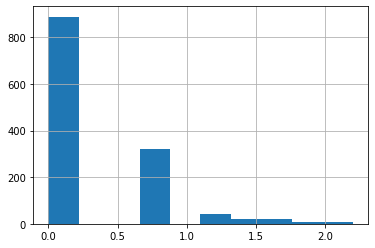

In [26]:
# transform data with log-norm

# sibsp # doesn't make it look more normal
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

<AxesSubplot:>

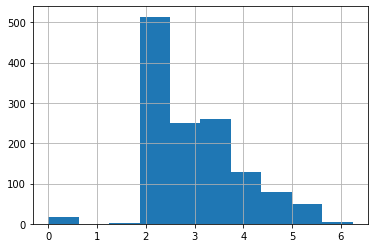

In [27]:
# far
all_data['normal_fare'] = np.log(all_data.Fare+1)
all_data.normal_fare.hist()

In [28]:
# convert pclass into category for encoder
all_data.Pclass = all_data.Pclass.astype(str)

# create dummy variables from categories
# normally use onehotencoder
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp',
                                       'normal_fare','Parch','Embarked','cabin_type',
                                       'cabin_multiple', 'ticket_numeric','name_title',
                                       'train_test']])

# split into train and test
x_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
x_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

(889,)

In [29]:
# scale data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'normal_fare']] = scale.fit_transform(
    all_dummies_scaled[['Age', 'SibSp', 'Parch', 'normal_fare']])


x_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
x_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)


# **MODELS**

start with baseline without tweaking

In [30]:
# n-fold cross validation
from sklearn.model_selection import cross_val_score

# naive bayes
from sklearn.naive_bayes import GaussianNB

# logistic regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn import tree

# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# support vector classifier
from sklearn.svm import SVC





In [31]:
# start with naive bayes as first baseline becuase most simple

gnb = GaussianNB()
cv_gnb = cross_val_score(gnb,x_train_scaled,y_train,cv=5)
print(cv_gnb)
print(cv_gnb.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [32]:
# logistic regression
# max_iter = how many different model iterations it goes through, adding/subtracting
# different predictor variables

lr = LogisticRegression(max_iter = 2000)
cv_lr =cross_val_score(lr,x_train_scaled,y_train,cv=5)
print(cv_lr)
print(cv_lr.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [33]:
# decistion tree

dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt,x_train_scaled,y_train,cv=5)
print(cv_dt)
print(cv_dt.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.79661017]
0.7750523709769569


In [34]:
# KNeighbors

knc = KNeighborsClassifier()
cv_knc = cross_val_score(knc,x_train_scaled,y_train,cv=5)
print(cv_knc)
print(cv_knc.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [35]:
# Random Forest

rfc = RandomForestClassifier(random_state = 1)
cv_rfc = cross_val_score(rfc,x_train_scaled,y_train,cv=5)
print(cv_rfc)
print(cv_rfc.mean())

[0.8258427  0.78651685 0.86516854 0.73033708 0.83615819]
0.8088046721259442


In [36]:
# support vector classifier

svc = SVC(probability = True)
cv_svc = cross_val_score(svc,x_train_scaled,y_train,cv=5)
print(cv_svc)
print(cv_svc.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


**Voting Classifier**

Takes all the models and has them vote on each decision

soft - averages probabilities of the classifiers

hard - counts just the votes (yes/no)


In [37]:
from sklearn.ensemble import VotingClassifier
voting_class = VotingClassifier(estimators = [('lr',lr),('knn',knc),('gnb',gnb),
                                             ('dt',dt),('rfc',rfc),('svc',svc)],
                               voting = 'soft')

cv_vc = cross_val_score(voting_class, x_train_scaled, y_train, cv = 5)
print(cv_vc)
print(cv_vc.mean())

[0.81460674 0.81460674 0.8258427  0.78089888 0.87570621]
0.8223322541738082


In [38]:
# this is hot you fit the model and then test it with the test data
# you put the predicted array into a data frame and the submit

voting_class.fit(x_train_scaled, y_train)

y_hat_base_vc = voting_class.predict(x_test_scaled)



In [39]:
basic_submission = {'PassengerId':test.PassengerId, 'Survived':y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)